In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats.multitest as sm

Average trials until first false-positive

In [2]:


#https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
mu, sigma = 8, 2 # mean and standard deviation
totalcount = 0
n = 30
for i in range(20):
    s1 = np.random.normal(mu, sigma, n)
    s2 = np.random.normal(mu, sigma, n)
    count = 1
    statistics, pvalue = stats.ttest_ind(s1, s2)
    while pvalue > 0.05:
        s1 = np.random.normal(mu, sigma, n)
        s2 = np.random.normal(mu, sigma, n)
        count += 1
        statistics, pvalue = stats.ttest_ind(s1, s2)
    totalcount += count

average = totalcount / 20
print(average)

23.8


Graph differing N

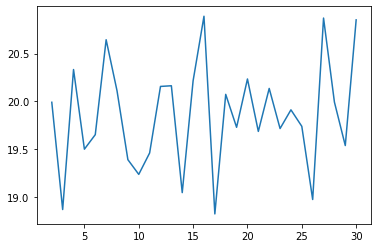

In [3]:
x_var = []
y_var = []

for j in range(2,31):
    n=j
    x_var.append(n)
    totalcount = 0
    for i in range(1000):
        s1 = np.random.normal(mu, sigma, n)
        s2 = np.random.normal(mu, sigma, n)
        count = 1
        statistics, pvalue = stats.ttest_ind(s1, s2)
        while pvalue > 0.05:
            s1 = np.random.normal(mu, sigma, n)
            s2 = np.random.normal(mu, sigma, n)
            count = count + 1
            statistics, pvalue = stats.ttest_ind(s1, s2)
        totalcount += count 
    average = totalcount / 1000
    y_var.append(average)

plt.plot(x_var,y_var)
plt.show(block = True)

Bonferroni

In [15]:
x_var = []
y_var = []
count = 0
for j in range(2, 31):
    pvals = []
    n = j * 100
    x_var.append(n)
    for i in range(1000):
        s1 = np.random.normal(mu, sigma, n)
        s2 = np.random.normal(mu, sigma, n)
        statistics, pvalue = stats.ttest_ind(s1, s2)
        pvals.append(pvalue)
    bonferroni = sm.multipletests(pvals, alpha = 0.05, method='bonferroni')[0]
    bonferroni_pvals = sm.multipletests(pvals, alpha = 0.05, method='bonferroni')[1]
    print("n: " + str(n) + " " + str(np.count_nonzero(bonferroni == True)))

n: 200 0
n: 300 0
n: 400 0
n: 500 0
n: 600 0
n: 700 0
n: 800 0
n: 900 0
n: 1000 0
n: 1100 0
n: 1200 0
n: 1300 0
n: 1400 0
n: 1500 0
n: 1600 0
n: 1700 0
n: 1800 1
n: 1900 0
n: 2000 0
n: 2100 0
n: 2200 0
n: 2300 0
n: 2400 0
n: 2500 0
n: 2600 0
n: 2700 0
n: 2800 0
n: 2900 0
n: 3000 0


Holm

In [16]:
x_var = []
y_var = []
count = 0
for j in range(2, 31):
    pvals = []
    n = j * 1000
    x_var.append(n)
    for i in range(1000):
        s1 = np.random.normal(mu, sigma, n)
        s2 = np.random.normal(mu, sigma, n)
        statistics, pvalue = stats.ttest_ind(s1, s2)
        pvals.append(pvalue)
    holm = sm.multipletests(pvals, alpha = 0.05, method='holm')[0]
    holm_pvals = sm.multipletests(pvals, alpha = 0.05, method='holm')[1]
    print("n: " + str(n) + " " + str(np.count_nonzero(holm == True)))

n: 2000 0
n: 3000 0
n: 4000 0
n: 5000 0
n: 6000 0
n: 7000 1
n: 8000 0
n: 9000 0
n: 10000 0
n: 11000 0
n: 12000 0
n: 13000 0
n: 14000 0
n: 15000 0
n: 16000 0
n: 17000 0
n: 18000 0
n: 19000 0
n: 20000 0
n: 21000 0
n: 22000 0
n: 23000 0
n: 24000 0
n: 25000 0
n: 26000 0
n: 27000 0
n: 28000 0
n: 29000 0
n: 30000 0


Benjamini-Hochberg

In [17]:
x_var = []
y_var = []
count = 0
for j in range(2, 31):
    pvals = []
    n = j * 1000
    x_var.append(n)
    for i in range(1000):
        s1 = np.random.normal(mu, sigma, n)
        s2 = np.random.normal(mu, sigma, n)
        statistics, pvalue = stats.ttest_ind(s1, s2)
        pvals.append(pvalue)
    benjamini = sm.multipletests(pvals, alpha = 0.05, method='fdr_by')[0]
    benjamini_pvals = sm.multipletests(pvals, alpha = 0.05, method='fdr_by')[1]
    print("n: " + str(n) + " " + str(np.count_nonzero(benjamini == True)))

n: 2000 0
n: 3000 0
n: 4000 0
n: 5000 0
n: 6000 0
n: 7000 0
n: 8000 0
n: 9000 0
n: 10000 0
n: 11000 0
n: 12000 0
n: 13000 0
n: 14000 0
n: 15000 0
n: 16000 0
n: 17000 0
n: 18000 0
n: 19000 0
n: 20000 0
n: 21000 0
n: 22000 0
n: 23000 0
n: 24000 0
n: 25000 0
n: 26000 0
n: 27000 0
n: 28000 0
n: 29000 1
n: 30000 0


Two normal distributions with means 7 and 9 and standard deviation 1.5

In [64]:
s1 = np.random.normal(7, 1.5, 30)
s2 = np.random.normal(9, 1.5, 30)
totalcount = 0
for i in range(20):
    s1 = np.random.normal(7, 1.5, 30)
    s2 = np.random.normal(9, 1.5, 30)
    count = 1
    statistics, pvalue = stats.ttest_ind(s1, s2)
    while pvalue < 0.05:
        s1 = np.random.normal(7, 1.5, 30)
        s2 = np.random.normal(9, 1.5, 30)
        count += 1
        statistics, pvalue = stats.ttest_ind(s1, s2)
    totalcount += count

average = totalcount / 20
print(average)

1029.75


Vary N

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


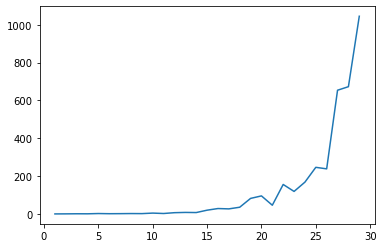

In [78]:
x_var = []
y_var = []

for j in range(1,30):
    n = j
    print(n)
    x_var.append(n)
    totalcount = 0
    for i in range(10):
        s1 = np.random.normal(7, 1.5, n)
        s2 = np.random.normal(9, 1.5, n)
        count = 1
        statistics, pvalue = stats.ttest_ind(s1, s2)
        while pvalue < 0.05:
            s1 = np.random.normal(7, 1.5, n)
            s2 = np.random.normal(9, 1.5, n)
            count = count + 1
            statistics, pvalue = stats.ttest_ind(s1, s2)
        totalcount += count 
    average = totalcount / 10
    y_var.append(average)

plt.plot(x_var,y_var)
plt.show(block = True)

Bonferroni False Negative

In [87]:
x_var = []
y_var = []
count = 0
for j in range(1, 30):
    pvals = []
    n = j
    x_var.append(n)
    for i in range(1000):
        s1 = np.random.normal(7, 1.5, n)
        s2 = np.random.normal(9, 1.5, n)
        statistics, pvalue = stats.ttest_ind(s1, s2)
        pvals.append(pvalue)
    bonferroni = sm.multipletests(pvals, alpha = 0.05, method='bonferroni')[0]
    bonferroni_pvals = sm.multipletests(pvals, alpha = 0.05, method='bonferroni')[1]
    #count how many false negatives for each n
    print("n: " + str(n) + " " + str(np.count_nonzero(bonferroni == False)))

n: 1 1000
n: 2 1000
n: 3 999
n: 4 1000
n: 5 998
n: 6 995
n: 7 991
n: 8 986
n: 9 964
n: 10 956
n: 11 937
n: 12 918
n: 13 880
n: 14 876
n: 15 830
n: 16 780
n: 17 753
n: 18 658
n: 19 671
n: 20 617
n: 21 570
n: 22 512
n: 23 464
n: 24 441
n: 25 387
n: 26 381
n: 27 333
n: 28 303
n: 29 242


Holm False Negative

In [88]:
x_var = []
y_var = []
count = 0
for j in range(1, 30):
    pvals = []
    n = j
    x_var.append(n)
    for i in range(1000):
        s1 = np.random.normal(7, 1.5, n)
        s2 = np.random.normal(9, 1.5, n)
        statistics, pvalue = stats.ttest_ind(s1, s2)
        pvals.append(pvalue)
    holm = sm.multipletests(pvals, alpha = 0.05, method='holm')[0]
    holm_pvals = sm.multipletests(pvals, alpha = 0.05, method='holm')[1]
    #count how many false negatives for each n
    print("n: " + str(n) + " " + str(np.count_nonzero(holm == False)))

n: 1 0
n: 2 1000
n: 3 999
n: 4 1000
n: 5 998
n: 6 995
n: 7 988
n: 8 985
n: 9 965
n: 10 952
n: 11 925
n: 12 904
n: 13 869
n: 14 820
n: 15 815
n: 16 743
n: 17 752
n: 18 667
n: 19 635
n: 20 543
n: 21 485
n: 22 425
n: 23 403
n: 24 317
n: 25 236
n: 26 179
n: 27 150
n: 28 154
n: 29 75


Benjamini-Hochberg False Negatives

In [89]:
x_var = []
y_var = []
count = 0
for j in range(1, 30):
    pvals = []
    n = j
    x_var.append(n)
    for i in range(1000):
        s1 = np.random.normal(7, 1.5, n)
        s2 = np.random.normal(9, 1.5, n)
        statistics, pvalue = stats.ttest_ind(s1, s2)
        pvals.append(pvalue)
    benjamini = sm.multipletests(pvals, alpha = 0.05, method='fdr_bh')[0]
    benjamini_pvals = sm.multipletests(pvals, alpha = 0.05, method='fdr_bh')[1]
    #count how many false negatives for each n
    print("n: " + str(n) + " " + str(np.count_nonzero(benjamini == False)))

n: 1 1000
n: 2 999
n: 3 1000
n: 4 936
n: 5 827
n: 6 716
n: 7 503
n: 8 367
n: 9 302
n: 10 226
n: 11 169
n: 12 128
n: 13 126
n: 14 76
n: 15 69
n: 16 51
n: 17 36
n: 18 20
n: 19 29
n: 20 20
n: 21 9
n: 22 18
n: 23 7
n: 24 3
n: 25 3
n: 26 1
n: 27 5
n: 28 4
n: 29 2
